In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0bb873b9ddfcd19f2ecc390d9e351546


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | san pedro
Processing Record 6 of Set 1 | atar
Processing Record 7 of Set 1 | playa vicente
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | port hardy
Processing Record 10 of Set 1 | shimoda
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | lobito
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | mareeba
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | gat
Processing Record 21 of Set 1 | avarua
Processing Record 22 of 

Processing Record 37 of Set 4 | nioro
Processing Record 38 of Set 4 | majene
Processing Record 39 of Set 4 | nijar
Processing Record 40 of Set 4 | nangong
Processing Record 41 of Set 4 | banyo
Processing Record 42 of Set 4 | pemba
Processing Record 43 of Set 4 | don benito
Processing Record 44 of Set 4 | faya
Processing Record 45 of Set 4 | karauzyak
City not found. Skipping...
Processing Record 46 of Set 4 | palmer
Processing Record 47 of Set 4 | lushunkou
City not found. Skipping...
Processing Record 48 of Set 4 | hofn
Processing Record 49 of Set 4 | pafos
Processing Record 50 of Set 4 | lompoc
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | amderma
City not found. Skipping...
Processing Record 3 of Set 5 | tautira
Processing Record 4 of Set 5 | jabinyanah
Processing Record 5 of Set 5 | borogontsy
Processing Record 6 of Set 5 | ketchikan
Processing Record 7 of Set 5 | mayo
Processing Record 8 of Set 5 | bubaque
Processing Record 9 of Set 5 | boa vista
Processing 

Processing Record 26 of Set 8 | kavaratti
Processing Record 27 of Set 8 | tecoanapa
Processing Record 28 of Set 8 | svirsk
Processing Record 29 of Set 8 | lachi
Processing Record 30 of Set 8 | charagua
Processing Record 31 of Set 8 | davila
Processing Record 32 of Set 8 | san cristobal
Processing Record 33 of Set 8 | mangrol
Processing Record 34 of Set 8 | china
Processing Record 35 of Set 8 | baracoa
Processing Record 36 of Set 8 | ayan
Processing Record 37 of Set 8 | lazaro cardenas
Processing Record 38 of Set 8 | bajil
Processing Record 39 of Set 8 | sorland
Processing Record 40 of Set 8 | mercedes
Processing Record 41 of Set 8 | bousso
Processing Record 42 of Set 8 | cabedelo
Processing Record 43 of Set 8 | hambantota
Processing Record 44 of Set 8 | lokosovo
Processing Record 45 of Set 8 | oranjemund
Processing Record 46 of Set 8 | dakar
Processing Record 47 of Set 8 | hailar
Processing Record 48 of Set 8 | gibsons
Processing Record 49 of Set 8 | vardo
Processing Record 50 of Set 8

Processing Record 13 of Set 12 | huilong
Processing Record 14 of Set 12 | takoradi
Processing Record 15 of Set 12 | shingu
Processing Record 16 of Set 12 | moissala
Processing Record 17 of Set 12 | luebo
Processing Record 18 of Set 12 | yar-sale
Processing Record 19 of Set 12 | terrace
Processing Record 20 of Set 12 | sembakung
Processing Record 21 of Set 12 | oregon city
Processing Record 22 of Set 12 | payson
Processing Record 23 of Set 12 | tomra
Processing Record 24 of Set 12 | livingston
Processing Record 25 of Set 12 | marrakesh
Processing Record 26 of Set 12 | novyy urengoy
Processing Record 27 of Set 12 | los llanos de aridane
Processing Record 28 of Set 12 | staraya mayna
Processing Record 29 of Set 12 | valle de allende
Processing Record 30 of Set 12 | mesopotamia
Processing Record 31 of Set 12 | araouane
Processing Record 32 of Set 12 | aljezur
Processing Record 33 of Set 12 | kalamare
Processing Record 34 of Set 12 | mondeville
Processing Record 35 of Set 12 | paradwip
City

In [10]:
len(city_data)

556

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,82.36,75,8,13.09,KI,2020-09-30 01:14:24
1,Ushuaia,-54.80,-68.30,33.80,80,40,13.87,AR,2020-09-30 01:10:49
2,Rikitea,-23.12,-134.97,69.89,78,70,21.85,PF,2020-09-30 01:11:01
3,San Pedro,14.35,121.02,87.01,79,40,6.93,PH,2020-09-30 01:14:24
4,Atar,20.52,-13.05,89.89,28,0,7.87,MR,2020-09-30 01:14:25
5,Playa Vicente,17.83,-95.82,72.46,73,100,6.35,MX,2020-09-30 01:14:25
6,Tasiilaq,65.61,-37.64,32.00,92,100,4.70,GL,2020-09-30 01:10:42
7,Port Hardy,50.70,-127.42,66.20,77,20,2.15,CA,2020-09-30 01:14:25
8,Shimoda,34.67,138.95,69.80,68,40,16.11,JP,2020-09-30 01:14:26
9,Port Elizabeth,-33.92,25.57,48.20,93,0,4.70,ZA,2020-09-30 01:11:48


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-09-30 01:14:24,3.07,172.79,82.36,75,8,13.09
1,Ushuaia,AR,2020-09-30 01:10:49,-54.80,-68.30,33.80,80,40,13.87
2,Rikitea,PF,2020-09-30 01:11:01,-23.12,-134.97,69.89,78,70,21.85
3,San Pedro,PH,2020-09-30 01:14:24,14.35,121.02,87.01,79,40,6.93
4,Atar,MR,2020-09-30 01:14:25,20.52,-13.05,89.89,28,0,7.87


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1601430277.5310009

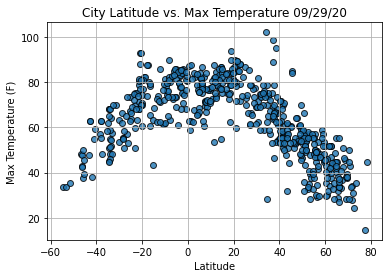

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

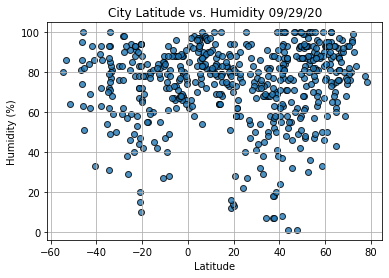

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

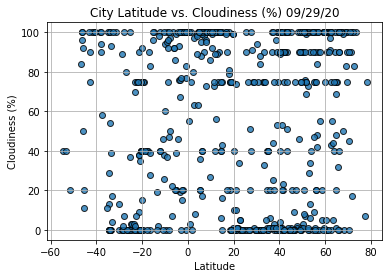

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

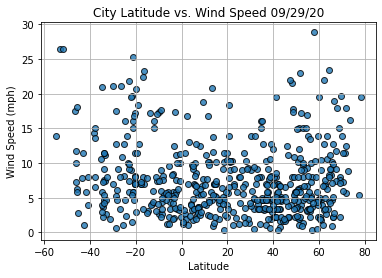

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()